In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

import random

In [2]:
circ = QuantumCircuit(40, 40)

circ.h(range(40))

qubit_indices = [i for i in range(40)]
for i in range(10):
    control, target, t = random.sample(qubit_indices, 3)
    circ.cx(control, target)
    circ.t(t)
circ.measure(range(40), range(40))

In [11]:
# Create statevector method simulator
statevector_simulator = AerSimulator(method='statevector')

# Transpile circuit for backend
tcirc = transpile(circ, statevector_simulator)

# Try and run circuit
statevector_result =  statevector_simulator.run(tcirc, shots=1).result()
print('This succeeded?: {}'.format(statevector_result.success))
print('Why not? {}'.format(statevector_result.status))

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Insufficient memory to run circuit circuit-120 using the statevector simulator. Required memory: 16777216M, max memory: 32637M


This succeeded?: False
Why not? ERROR:  [Experiment 0] Insufficient memory to run circuit circuit-120 using the statevector simulator. Required memory: 16777216M, max memory: 32637M


In [18]:
extended_stabilizer_simulator =AerSimulator(method='extended_stabilizer')

tcirc = transpile(circ, extended_stabilizer_simulator)

extended_stabilizier_result = extended_stabilizer_simulator.run(tcirc, shots=1).result()
print('This succeeded?: {}'.format(extended_stabilizier_result.success))

This succeeded?: True


In [20]:
#Extended Stabilizerメソッドは2つの部分から構成

small_circ = QuantumCircuit(2,2)
small_circ.h(0)
small_circ.cx(0, 1)
small_circ.t(0)
small_circ.measure([0,1],[0,1])
expected_results={'00':50, '11':50}

In [21]:
tsmall_circ =transpile(small_circ,extended_stabilizer_simulator)
result = extended_stabilizer_simulator.run(
    tsmall_circ, shots=100).result()
counts =result.get_counts(0)
print('100 shots in {}s'.format(result.time_taken))

100 shots in 0.3229670524597168s


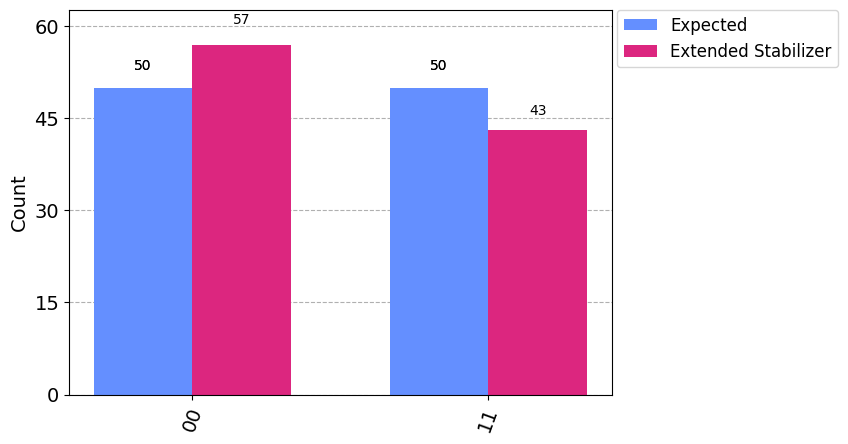

In [22]:
plot_histogram([expected_results, counts],
               legend=['Expected', 'Extended Stabilizer'])

100 shots in 1.0000355243682861s


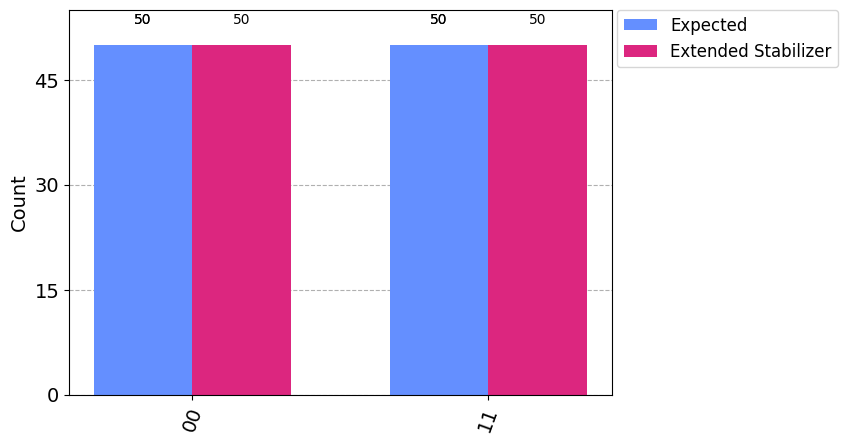

In [23]:
# Add runtime options for extended stabilizer simulator
opts = {'extended_stabilizer_approximation_error': 0.03}

reduced_error = extended_stabilizer_simulator.run(
    tsmall_circ, shots=100, **opts).result()

reduced_error_counts = reduced_error.get_counts(0)
print('100 shots in {}s'.format(reduced_error.time_taken))
plot_histogram([expected_results, reduced_error_counts],
               legend=['Expected', 'Extended Stabilizer'])

In [27]:
print("The curcuit above, with 100 shots at precision 0.03 "
      "and default mixing time, needed {}s".format(int(reduced_error.time_taken)))

opts = {
    'extended_stabilizer_approximation_error': 0.03,
    'extended_stabilizer_mixing_time':100
}

optimized = extended_stabilizer_simulator.run(
    tsmall_circ, shots=100, **opts).result()

print('Dialing down the mixing time, we completed in just {}s'.format(optimized.time_taken))

The curcuit above, with 100 shots at precision 0.03 and default mixing time, needed 1s
Dialing down the mixing time, we completed in just 0.9617257118225098s


In [ ]:
opts = {'extended_stabilizer_mixing_time': 150}

multishot = extended_stabilizer_simulator.run(
    tcirc, shots=150, **opts).result()
print("100 shots took {} s".format(multishot.time_taken))

In [ ]:
opts = {
    'extended_stabilizer_measure_sampling': True,
    'extended_stabilizer_mixing_time': 150
}

measure_sampling = extended_stabilizer_simulator.run(
    circ, shots=150, **opts).result()
print("With the optimization, 100 shots took {} s".format(result.time_taken))